In [1]:
import numpy as np
npzfile1 = np.load("D:\workspace\LinearMixedModel\Data\smalldata\data.npz")
beta_true = npzfile1['arr_2']
npzfile2 = np.load("D:\workspace\LinearMixedModel\Data\smalldata\ML.npz")
# print npzfile2.size
beta_reml = npzfile2['arr_0']
beta_ml = npzfile2['arr_1']
beta_lasso = npzfile2['arr_2']
beta_true = beta_true.reshape((-1,))
beta_lasso = beta_lasso.reshape((-1,))
print np.shape(beta_ml)
print np.shape(beta_lasso)
print np.shape(beta_reml)
print np.shape(beta_true)

(100,)
(100,)
(100,)
(100,)


In [5]:
def calROC(threshod , method):
    beta_true_r = np.where(beta_true > 0, 1 , 0)
    ones = float(np.count_nonzero(beta_true_r))
    beta_ml_r = np.where(beta_ml > threshod, 1 , 0)
    beta_reml_r = np.where(beta_reml > threshod, 1, 0)
    beta_lasso_r = np.where(beta_lasso > threshod , 1 ,0)
    if method == 'ml':
        mat = beta_true_r - beta_ml_r
    if method == 'reml':
        mat = beta_true_r - beta_reml_r
    if method == 'lasso':
        mat = beta_true_r - beta_lasso_r
    count = np.bincount(mat+1)
    countii = np.nonzero(count)[0]
    outcome = zip(countii , count)
    if len(outcome) == 3:
        TPR = 1 - outcome[2][1] / ones
        FPR = outcome[0][1]/ (np.shape(beta_reml)[0] - ones)
    else:
        if outcome[0][0] == 0:
            TPR = 1
            FPR = outcome[0][1]/ (np.shape(beta_reml)[0] - ones)
        else:
            TPR = 0
            FPR = 0
    # print outcome
    return TPR, FPR
# calROC(0 , 'reml')
# calROC(0.5 , 'ml')
# calROC(0.5 , 'lasso')

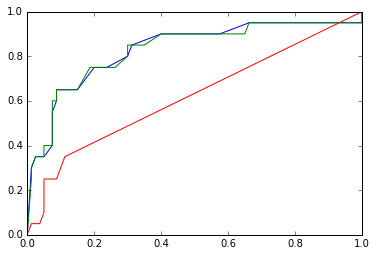

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
def drawROC(start , end , num, method):
    TPR_set = []
    FPR_set = []
    for i in np.linspace(start , end , num):
        TPR, FPR = calROC(i, method)
        TPR_set.append(TPR)
        FPR_set.append(FPR)
    plt.plot(FPR_set, TPR_set)   
    # print TPR_set
    # print FPR_set
drawROC(-2 , 3 ,100, 'ml')
drawROC(-1, 2, 100, 'reml')
drawROC(-1, 2 , 100, 'lasso')
plt.show()